In [68]:
import scipy as sp
from scipy import sparse
import networkx as nx
from scipy.io import mmread
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt


In [69]:
G = nx.read_edgelist("data.txt", nodetype=int, data=(("weight", int),))
G = nx.Graph(G)

In [70]:
list(G.edges(data=True))

[(0, 1, {'weight': 4}),
 (0, 2, {'weight': 9}),
 (1, 2, {'weight': 2}),
 (1, 3, {'weight': 6}),
 (2, 4, {'weight': 1}),
 (2, 3, {'weight': 1})]

In [71]:
def print_graph(G, ct):
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos)
    labels = nx.get_edge_attributes(G, 'weight')
    x = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show("filename" + str(ct) + ".png")
 

# print_graph(G)

In [72]:
print(G.number_of_nodes())

5


In [73]:
def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])


def union(parent, rank, x, y):
    xroot = find(parent, x)
    yroot = find(parent, y)

    # Attach smaller rank tree under root of
    # high rank tree (Union by Rank)
    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[xroot] > rank[yroot]:
        parent[yroot] = xroot

    # If ranks are same, then make one as root
    # and increment its rank by one
    else:
        parent[yroot] = xroot
        rank[xroot] += 1


In [74]:
class DisjointSet:
    parent = {}
 
    # perform MakeSet operation
    def makeSet(self, N):
 
        # create `N` disjoint sets (one for each vertex)
        for i in range(N):
            self.parent[i] = i
 
    # Find the root of the set in which element `k` belongs
    def Find(self, k):
 
        # if `k` is root
        if self.parent[k] == k:
            return k
 
        # recur for the parent until we find the root
        return self.Find(self.parent[k])
 
    # Perform Union of two subsets
    def Union(self, a, b):
 
        # find the root of the sets in which elements
        # `x` and `y` belongs
        x = self.Find(a)
        y = self.Find(b)
 
        self.parent[x] = y


Edges in the constructed MST


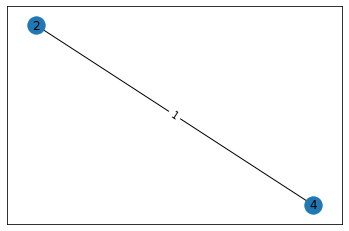

Edges in the constructed MST


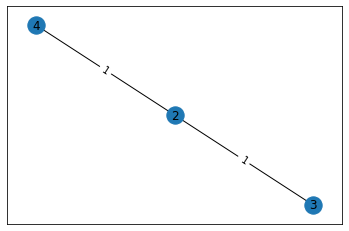

Edges in the constructed MST


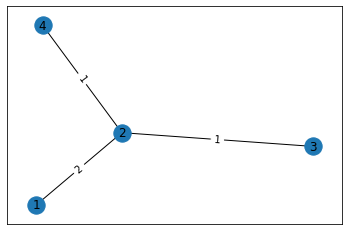

Edges in the constructed MST


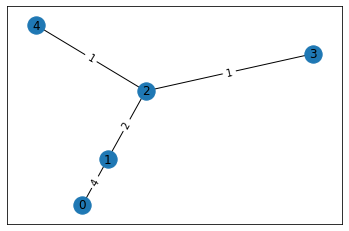

In [75]:
def kruskalAlgo(G):
 
    # stores the edges present in MST
    MST = []
    # Initialize `DisjointSet` class.
    # Create a singleton set for each element of the universe.
    ds = DisjointSet()
    ds.makeSet(G.number_of_nodes())
 
    index = 0
    ct = 0
    graph = G
    G = sorted(G.edges(data=True), key=lambda item: item[2]['weight'])
    # sort edges by increasing weight
    # edges.sort(key=lambda x: x[2])
 
    # MST contains exactly `V-1` edges
    while len(MST) != graph.number_of_nodes() - 1:
 
        # consider the next edge with minimum weight from the graph
        (src, dest, weight) = G[index]
        weight = weight.get('weight')
        index = index + 1
 
        # find the root of the sets to which two endpoints
        # vertices of the next edge belongs
        x = ds.Find(src)
        y = ds.Find(dest)
 
        # if both endpoints have different parents, they belong to
        # different connected components and can be included in MST
        if x != y:
            MST.append((src, dest, weight))
            ds.Union(x, y)
            minimumCost = 0
            N = nx.Graph()
            print("Edges in the constructed MST")
            for u, v, weight in MST:
                minimumCost += weight
                N.add_weighted_edges_from([(u, v, weight)])
            print_graph(N, ct)
            ct = ct + 1    
    
    # minimumCost = 0
    # G = nx.Graph()
    # print("Edges in the constructed MST")
    # for u, v, weight in MST:
    #     minimumCost += weight
    #     G.add_weighted_edges_from([(u, v, weight)])
    
    
    return minimumCost, G
    

cost , G = kruskalAlgo(G)
# print("Cost of MST : ", cost)
# print_graph(G)